In [27]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000) # Adjust as per your screen size


In [8]:
# Loading the dataset

# load the original data
flights = pd.read_csv("/Users/david/Downloads/archive/DelayedFlights.csv")
flights.head()

# get 200.000 random samples and save in a csv
flights.sample(n=200000).to_csv('DelayedFlights_200_000_random_samples.csv', index=False)

df = pd.read_csv("DelayedFlights_200_000_random_samples.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1043994,2008,2,29,5,2024.0,1956,2353.0,2330,9E,5684,80309E,149.0,154.0,114.0,23.0,28.0,MSP,RIC,970,7.0,28.0,0,N,0,0.0,0.0,0.0,0.0,23.0
1,84347,2008,1,29,2,1909.0,1845,2022.0,2020,WN,1525,N260WN,73.0,95.0,58.0,2.0,24.0,CMH,PHL,405,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,4548091,2008,8,25,1,1736.0,1720,1847.0,1845,DL,65,N653DL,251.0,265.0,231.0,2.0,16.0,ATL,LAS,1747,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,6002227,2008,11,21,5,1448.0,1440,1551.0,1550,WN,1411,N263WN,123.0,130.0,102.0,1.0,8.0,PHX,SFO,651,4.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,5683584,2008,10,31,5,2043.0,1940,2228.0,2134,DL,1132,N996DL,105.0,114.0,87.0,54.0,63.0,CVG,BDL,661,5.0,13.0,0,N,0,54.0,0.0,0.0,0.0,0.0


In [ ]:
# 1- Briefly explain which variables there are in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199287 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            200000 non-null  object 
 12  ActualElapsedTime  199158 non-null  float64
 13  CRSElapsedTime     199981 non-null  float64
 14  AirTime            199158 non-null  float64
 15  ArrDelay           199158 non-null  float64
 16  De

<h2>Briefly explain which variables there are in the data set</h2>
Year 2008<br>
Month 1-12<br>
DayofMonth 1-31<br>
DayOfWeek 1 (Monday) - 7 (Sunday)<br>
DepTime actual departure time (local, hhmm)<br>
CRSDepTime scheduled departure time (local, hhmm)<br>
ArrTime actual arrival time (local, hhmm)<br>
CRSArrTime scheduled arrival time (local, hhmm)<br>
UniqueCarrier unique carrier code<br>
FlightNum flight number<br>
TailNum plane tail number: aircraft registration, unique aircraft identifier<br>
ActualElapsedTime in minutes<br>
CRSElapsedTime in minutes<br>
AirTime in minutes<br>
ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS)<br>
DepDelay departure delay, in minutes<br>
Origin origin IATA airport code<br>
Dest destination IATA airport code<br>
Distance in miles<br>
TaxiIn taxi in time, in minutes<br>
TaxiOut taxi out time in minutes<br>
Cancelled *was the flight cancelled<br>
CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br>
Diverted 1 = yes, 0 = no<br>
CarrierDelay in minutes is within the control of the air carrier<br>
WeatherDelay in minutes is caused by extreme or hazardous weather conditions<br>
NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.<br>
SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.<br>
LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.<br>

<h2>Pre processing</h2>

In [ ]:
# Statiscally summarize the dataset and columns of interest. 
df.describe(include="all")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199287.000000,200000.000000,200000,199158.000000,...,199287.000000,199942.000000,200000.00000,200000,200000.000000,128473.000000,128473.000000,128473.000000,128473.000000,128473.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38859,NaN,...,NaN,NaN,NaN,199924,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,6.102170,15.740185,3.986520,1517.454740,1467.025975,1610.219959,1633.446495,NaN,133.227764,...,6.788416,18.218273,0.00038,NaN,0.003830,19.091661,3.703634,15.027920,0.089272,25.212247
std,0.0,3.478549,8.792543,1.995933,451.453094,425.602835,547.778555,465.505228,NaN,72.018781,...,5.192660,14.272680,0.01949,NaN,0.061769,43.313833,21.477402,33.673454,1.986412,42.279544
min,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,15.000000,...,0.000000,0.000000,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1202.000000,1133.000000,1315.000000,1324.000000,NaN,80.000000,...,4.000000,10.000000,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1544.000000,1510.000000,1715.000000,1705.000000,NaN,116.000000,...,6.000000,14.000000,0.00000,NaN,0.000000,2.000000,0.000000,2.000000,0.000000,8.000000
75%,2008.0,9.000000,23.000000,6.000000,1900.000000,1815.000000,2031.000000,2014.000000,NaN,165.000000,...,8.000000,21.000000,0.00000,NaN,0.000000,21.000000,0.000000,15.000000,0.000000,33.000000


In [ ]:
# How much missing data there is per column
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                713
CRSArrTime               0
UniqueCarrier            0
ActualElapsedTime      842
CRSElapsedTime          19
AirTime                842
ArrDelay               842
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 713
TaxiOut                 58
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71527
WeatherDelay         71527
NASDelay             71527
SecurityDelay        71527
LateAircraftDelay    71527
dtype: int64

Dropping columns not usefull:

In [ ]:
# Dropping columns not usefull
df = df.drop("Unnamed: 0", axis=1) #Empty
df = df.drop("FlightNum", axis=1) #There is no relation with the delay
df = df.drop("TailNum", axis=1) #There is no relation with the delay

In [ ]:
#Sanity Check for Negative values in ArrTime, CRSEArrivalTime, DepTime and CRSEDepTime
print(all(i < 0 for i in df['ArrTime']))
print(all(i < 0 for i in df['CRSArrTime']))
print(all(i < 0 for i in df['DepTime']))
print(all(i < 0 for i in df['CRSDepTime']))

Looking for NaNs:

In [ ]:
df_temp = df.drop(['Year', 'Month', 'DayofMonth','UniqueCarrier', 'Origin', 'Dest'], axis='columns') # I removed temporaly the non numerical columns to look for the reason of so many NaN values in the Delay reasons.
df[df['NASDelay'].isna()].count() #71040 samples of flights with CarrierDelay (or WeatherDelay or NASDelay or SecurityDelay or LateAircraftDelay) NaN
df.Diverted.value_counts()
#                               Diverted
#                                   0    199209
#                                   1       791
df.Cancelled.value_counts()
#                               Cancelled
#                                   0    199935
#                                   1        65
df[df.ArrDelay < 15].count() # 70184 rows


If we sum the diverted, the cancelled and the not delayed flights we have the same value of 71040 that are the samples that don't have value about delay. So we are going to set the NaN to 0 that brings more information.

In [22]:
df.fillna(0, inplace=True)
df[df['WeatherDelay'].isna()] # 0 samples

# ver se duplicates usando uma funcao com esse mesmo nome
# olhar outliers ou coisas sem sentido (daysofweek 8 por ex) de algumas variaveis que tenho interesse

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


Checking for duplicates:

In [25]:
df.duplicated().sum() #there are no duplicates

0

<h2>Visualizing the data Univariate Distribution of Features</h2>

We re going to create two functions to visualize univariate distribution of features using histogram and boxplot to numerical values and count plot to categorical values. But before, what is Univariate Distribution?

This term is used to describe the distribution's behavior of a single variable, detailing the range of values that the variable can take and how often it takes those values.

It is an examination of the probability or frequency of outcomes for a single variable. It's a fundamental aspect of statistical data analysis, where the focus is to describe and understand the pattern of variability of the data for that one variable.

Characteristics of a univariate distribution often described include:

Central Tendency: Where is the center of the distribution? Common measures of central tendency include the mean (average), median (middle value), and mode (most frequent value).

Spread: How much variability is there in the data? This can be described using the range (difference between the highest and lowest values), variance (average of the squared differences from the mean), and standard deviation (average distance from the mean).

Shape: The shape of the distribution could be symmetric, skewed (to the right or left), or bimodal (having two peaks). Skewness quantifies how asymmetrical the distribution is, while kurtosis measures the 'tailedness'—the prevalence of extreme values.

Outliers: Are there any data points that fall far from the rest of the data?

In [70]:
def plot_hist_and_boxplot(df, feature):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    feature_to_plot = df.loc[:, feature]
    sns.histplot(feature_to_plot, color = 'steelblue', ax = ax1, kde=True) # histogram
    sns.boxplot(feature_to_plot, ax = ax2, color = 'steelblue', orient = 'h') # boxplot
    plt.show()

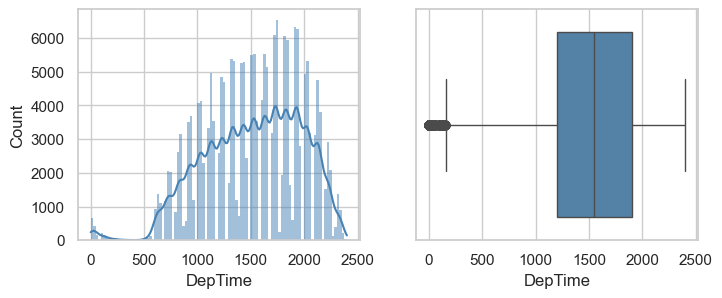

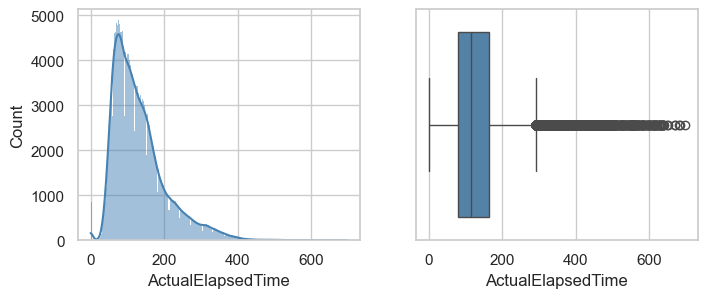

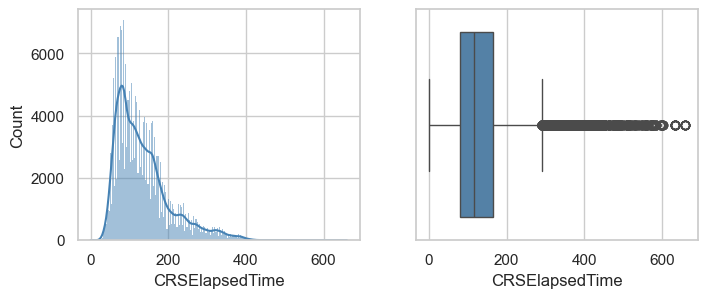

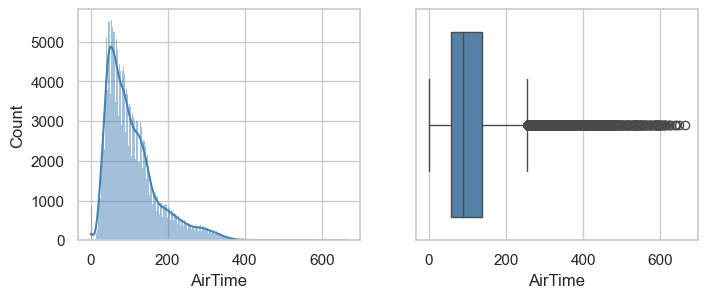

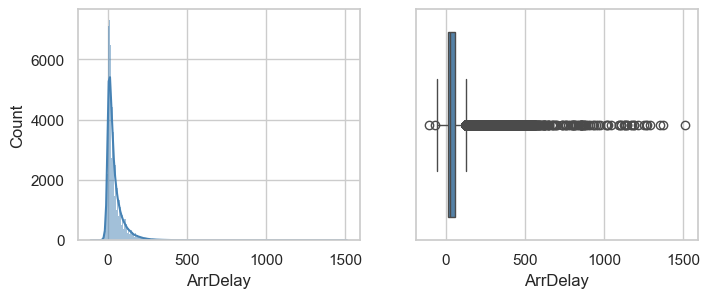

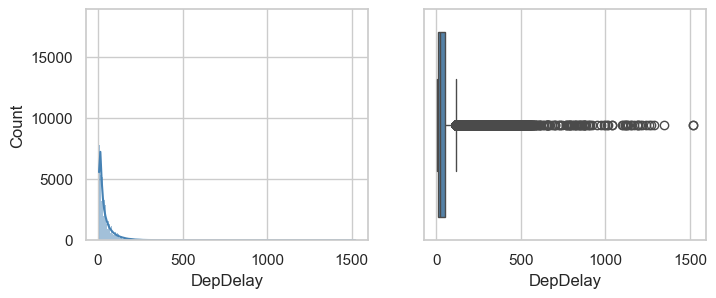

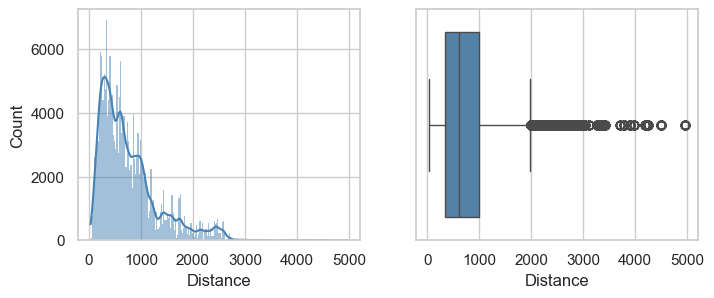

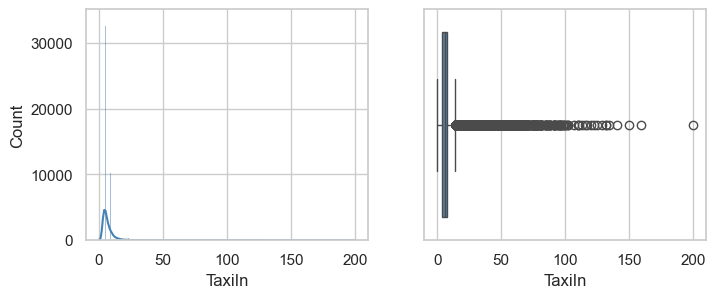

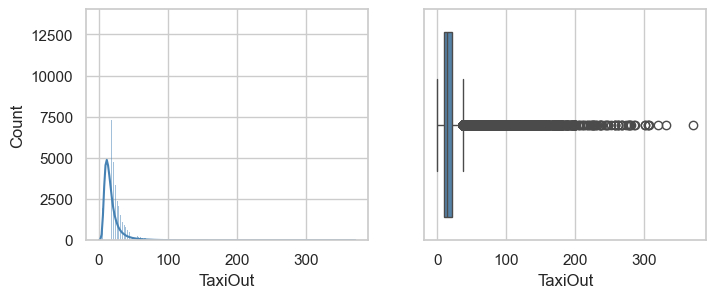

In [71]:
# for col in df.select_dtypes(include=[np.number]).columns:
for col in ['DepTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','TaxiIn','TaxiOut']:
    plot_hist_and_boxplot(df, col)

In [ ]:
#Creating a function to plot Count plot
def count_plot(df, feature):
    # sns.set(color_codes = 'Blue', style="whitegrid")
    # sns.set_style("whitegrid", {'axes.grid' : False})
    # sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

In [ ]:
if col in ['DayOfWeek','UniqueCarrier','Month', 'Cancelled','DayofMonth','CancellationCode','Diverted']:
    count_plot(df,col)

<h2>Creating columns to summarize information</h2>

We are going to create new columns:<br>
<ul>
<li>average_flight_speed (miles/min): to see if there is any useful information related to the speed
<li>dep_time: to summarize three columns (Year, Month and DayofMonth) in just one
<li>statu: to summarize three columns (ArrDelay, Diverted and Cancelled) in just one
</ul>

In [8]:
# Create new columns
# Flight speed
df['average_flight_speed (miles/min)'] = df.Distance / df.AirTime

# Departure Time
dep_time = pd.to_datetime(df.Year*10000 + df.Month*100 + df.DayofMonth, format='%Y%m%d')
df.insert(loc = 0, column = 'DepDate', value = dep_time)
df = df.drop("Year", axis = 1) # Now we have the year, month and day in just one column
df = df.drop("Month", axis = 1)
df = df.drop("DayofMonth", axis = 1)

# Creating status column
df.loc[:, 'Status'] = 'NOTHING'
df.loc[df.ArrDelay <= 15, 'Status'] = 0 # on time
df.loc[df.ArrDelay > 15, 'Status'] = 1 # slightly delayed
df.loc[df.ArrDelay >= 60, 'Status'] = 2 # hightly delayed
df.loc[df.Diverted == 1, 'Status'] = 3
df.loc[df.Cancelled == 1, 'Status'] = 4

df = df.drop("Cancelled", axis=1)
df = df.drop("Diverted", axis = 1)


<h2>Exercises</h2>

In [8]:
# Make a table of the airlines with the most accumulated delays.
print("Airlines with the most accumulated delays:\n")
print(df.groupby(['UniqueCarrier'], as_index=False)['ArrDelay'].sum().sort_values(by='ArrDelay', ascending=0).to_string(index=False))

Airlines with the most accumulated delays:

UniqueCarrier  ArrDelay
           WN 1188157.0
           AA  932228.0
           UA  687640.0
           MQ  664448.0
           OO  615192.0
           XE  535451.0
           DL  465872.0
           CO  418267.0
           EV  410635.0
           YV  381807.0
           US  362587.0
           NW  353899.0
           FL  317825.0
           B6  313131.0
           OH  273049.0
           9E  243936.0
           AS  148603.0
           F9   77295.0
           HA   26247.0
           AQ    1693.0


In [9]:
# What are the 10 longest flights?
print("The longest flights:\n")
print(df.sort_values(by='AirTime', ascending=1)[:10])

The longest flights:

          DepDate  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
198161 2008-05-27          2   1452.0        1437   1520.0        1522   
73338  2008-01-05          6   1621.0        1400   1821.0        1602   
180856 2008-07-29          2   1800.0        1640   2000.0        1800   
181561 2008-02-04          1   1055.0        1030   1125.0        1114   
132948 2008-02-04          1   2243.0        2210     10.0        2344   
169819 2008-02-01          5    640.0         630    805.0         750   
181540 2008-05-21          3   1135.0        1125   1155.0        1159   
25726  2008-03-19          3   1412.0        1320   1448.0        1355   
177460 2008-09-22          1   1410.0        1350   1446.0        1425   
155445 2008-07-18          5   2345.0        2110      5.0        2236   

       UniqueCarrier  ActualElapsedTime  CRSElapsedTime  AirTime  ...  TaxiIn  \
198161            OO               28.0            45.0      0.0  ...    25.0   
7

In [18]:
# And the most backward? Look for the longest routes and those with the most delays.
# We understand that the ArrDelay is more significative than the others delayed and we are going to use this in our case.

# First lets remove the negative delays, because it doesn't make sense
drop_indices = df[df.ArrDelay < 0].index
df.drop(drop_indices, inplace=True)

# And also delete the flights that have AirTime less than 5
drop_indices = df[df.AirTime < 5].index
df.drop(drop_indices, inplace=True)

# To understand better, lets just take a look at the 30 flights ordered by the longest flight and by the biggest delay
df.sort_values(by=['AirTime', 'ArrDelay'], ascending=[False, False]).iloc[0:30][['AirTime', 'ArrDelay']]

# Finally, lets create a column that is ArrDelay/AirTime
df["ProportionalDelay"] = (df.ArrDelay / df.AirTime).round(2)

print("The most backward flights:\n")
df.sort_values(by='ProportionalDelay', ascending=False).iloc[0:30][['AirTime', 'ArrDelay','ProportionalDelay']]

The most backward flights:



,AirTime,ArrDelay,ProportionalDelay
99298,17.0,859.0,50.53
132067,23.0,1143.0,49.70
97822,24.0,944.0,39.33
91247,40.0,1082.0,27.05
111094,32.0,852.0,26.62
34683,19.0,488.0,25.68
193624,39.0,960.0,24.62
98206,48.0,1085.0,22.60
8668,22.0,491.0,22.32
55117,26.0,570.0,21.92


In [19]:
# Do a statistical analysis of what you consider relevant
# Let's look for some correlation just between the columns that have numbers
df_numbers = df.drop(['UniqueCarrier', 'DepDate', 'Origin', 'Dest', 'CancellationCode'], axis='columns')
pd.set_option('display.max_columns', None)  # This will ensure all columns are displayed
df_numbers.head()
df_numbers.corr()
# It can be observed by the correlation that the factor that most impact in arrive delay is the departure delay, what makes sense.
# And after that it is the LateAircraftDelay what can be seen by analizing the correlation
# between the ArrDelay, Status and LateAircraftDelay.

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,average_flight_speed (miles/min),Status,Proportional%Delay,ProportionalDelay
DayOfWeek,1.000000,0.022843,0.030366,0.010278,0.018826,0.001649,0.004155,0.003730,0.004826,0.007892,0.007068,0.008013,-0.012443,0.008033,0.004781,-0.008733,-0.000490,0.010003,0.013158,-0.002549,0.001949,0.001953
DepTime,0.022843,1.000000,0.875304,0.446015,0.723682,-0.043466,-0.037370,-0.049828,0.118854,0.133661,-0.048984,-0.014352,0.023383,-0.050669,0.011233,0.021094,-0.010449,0.163641,-0.001610,0.147191,0.105273,0.105282
CRSDepTime,0.030366,0.875304,1.000000,0.381138,0.726034,-0.032422,-0.021744,-0.033096,0.037024,0.053307,-0.024618,-0.033813,0.006992,-0.110936,-0.013055,-0.030848,-0.013165,0.169270,0.026154,0.066753,0.041226,0.041236
ArrTime,0.010278,0.446015,0.381138,1.000000,0.588827,-0.017758,-0.017969,-0.022200,-0.057670,-0.059690,-0.032083,0.044506,-0.000543,-0.083325,-0.034029,0.036302,-0.003959,-0.042580,-0.017772,-0.007258,-0.030967,-0.030963
CRSArrTime,0.018826,0.723682,0.726034,0.588827,1.000000,0.036431,0.045499,0.029396,0.040189,0.051512,0.030435,0.011857,0.037057,-0.100318,-0.007747,0.008847,-0.010281,0.134440,0.083607,0.065329,0.006215,0.006224
ActualElapsedTime,0.001649,-0.043466,-0.032422,-0.017758,0.036431,1.000000,0.971503,0.975119,0.099181,0.033908,0.951944,0.172827,0.304147,0.008788,0.005753,0.173939,0.005405,-0.030853,0.522123,0.098718,-0.232954,-0.232947
CRSElapsedTime,0.004155,-0.037370,-0.021744,-0.017969,0.045499,0.971503,1.000000,0.986236,0.032332,0.037296,0.981549,0.107890,0.138358,0.025838,-0.012395,0.045394,0.006762,-0.008205,0.597030,0.028666,-0.284487,-0.284481
AirTime,0.003730,-0.049828,-0.033096,-0.022200,0.029396,0.975119,0.986236,1.000000,0.035401,0.018244,0.980299,0.089837,0.098974,0.018357,-0.014494,0.059859,0.007704,-0.017839,0.549403,0.033191,-0.289328,-0.289322
ArrDelay,0.004826,0.118854,0.037024,-0.057670,0.040189,0.099181,0.032332,0.035401,1.000000,0.955611,0.012067,0.144727,0.265940,0.506697,0.259645,0.390480,-0.002015,0.476007,-0.065536,0.711149,0.759213,0.759211
DepDelay,0.007892,0.133661,0.053307,-0.059690,0.051512,0.033908,0.037296,0.018244,0.955611,1.000000,0.018368,0.062962,0.057886,0.532836,0.241927,0.239441,-0.000718,0.509981,0.008725,0.634159,0.734877,0.734873


In [ ]:
# Export the dataset clean and with the new columns to Excel.
df.to_excel('new_data_set.xlsx')